<a href="https://colab.research.google.com/github/eriksali/DNN_2023_DL/blob/main/a1_pytorch_sklearn_knn_regression_final_ccpp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

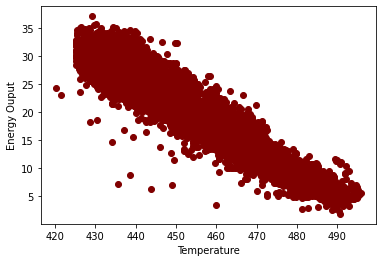

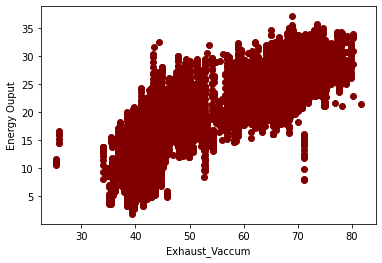

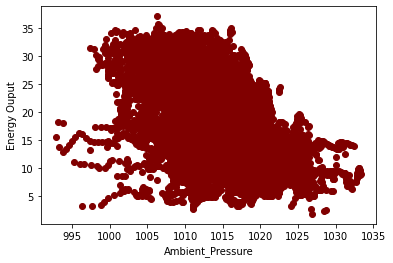

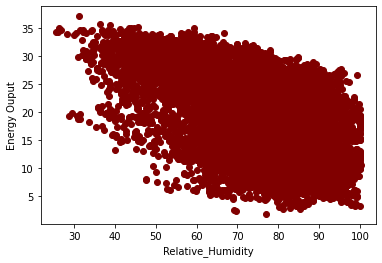

array([17.79666667, 23.385     , 23.33      , ..., 24.645     ,
       16.265     , 24.505     ])

In [9]:

# coding: utf-8

# # PROJECT LAYOUT

# #### The aim of this project is to predict the amount of energy(power) produced by the Combined Cycle Power Plant(CCPP).
# #### The project uses simple Linear Regression modelling and reduces the error by Decision Tree Regression.
# 
# #### The dataset contains columns giving values for Ambient Temperature, Exhaust Vaccum, Ambient Pressure, Relative Humidity and Energy Ouput. The data was collected over a six year period (2006-11).

# # A. Reading in the Data

# In[50]:

import pandas as pd

##data = pd.read_csv("Combined Cycle Power Plant.csv")
data = pd.read_csv("./ccpp.csv")
data.head()


# #### Giving the columns self-explanatory names

# In[51]:

data.columns = ["Temperature", "Exhaust_Vaccum", "Ambient_Pressure", "Relative_Humidity", "Energy_Output"]
data.head()

 
# In[67]:

data.isnull().sum()

# We can see that the data contains no null values.


# #### Checking the relation between columns with Energy Output.

# In[53]:

data.corr()["Energy_Output"]


# In[79]:

# Plotting the columns against the Energy Output.

for col in data.columns[:len(data.columns)-1]:
    plt.scatter(data[col], data["Energy_Output"], color="maroon")
    plt.ylabel("Energy Ouput")
    plt.xlabel(col)
    plt.show()


# #### We can see that the least related column is Relative Humidity, but it still is not completely unrelated so as to exclude it from the model.

# # B. Fitting Our Model and Predicting Models

# In[56]:

# Randomizing the rows.

X = np.random.permutation(data.index)
data = data.reindex(X)


# #### Creating test and train dataframes

# In[57]:

import numpy as np

A = int(len(data)*0.8)

test = data[:A]
train = data[A:]


# #### Fitting out model on training data and making training predictions

# In[85]:

cols = data.columns.drop("Energy_Output")

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(train[cols], train["Energy_Output"])

predictions_train = reg.predict(train[cols])

rmse = (np.mean((predictions_train - train["Energy_Output"])**2))**0.5
rmse


# #### Making Test Predictions

# In[86]:

predictions_test = reg.predict(test[cols])

rmse = (np.mean((predictions_test - test["Energy_Output"])**2))**0.5
rmse


# ### Comparing train and test rmse shows that our model is not overfitting.
# #### This is because of a dataset with columns that are nicely co-related with the target column and a moderate number of columns.

# In[87]:

# Making Test Predictions

predictions_test


# # C. Reducing Error by Decision Tree Regressor

# In[88]:

from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[cols], train["Energy_Output"])

predictions_DT = reg.predict(test[cols])

rmse_DT = (np.mean(predictions_DT - test["Energy_Output"])**2)**0.5
rmse_DT


# #### This shows that Decision Tree Regressor reduces our error greatly.
# 
# #### Making Predictions.

# In[64]:

predictions_DT


# ## Thus, above are the predictions for Energy Output for test dataframe.

# In[ ]:





/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:01:18   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:01:19   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:01:19   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:01:20   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:01:21   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

TypeError: ignored

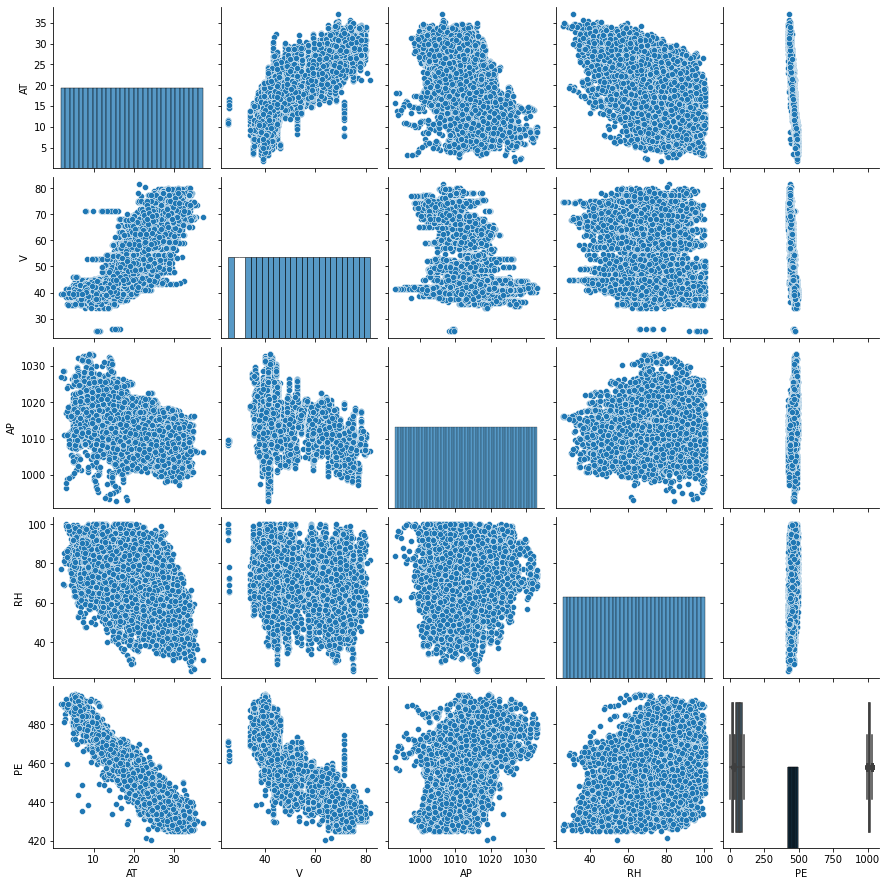

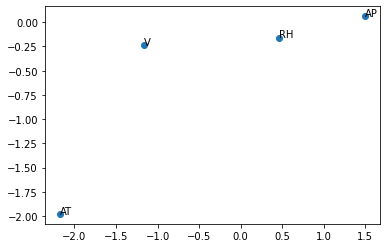

In [10]:

# coding: utf-8

# In[165]:

import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
  

# # Exploring the data 1b(i)

# In[166]:

powerplant_data = pd.read_excel('powerplant.xlsx', sheet_name='Sheet1')
powerplant_data


# #### There are total 9568 rows and 5 columns. The first four columns represents features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) and the last column represent response net hourly electrical energy output (PE). The rows represent the data values for each of the columns.

# # Pairwise scatterplots of all the varianbles 1b(ii)

# In[113]:

sns.pairplot(powerplant_data)


# #### It can be inferred from the scatter plots that the feature AT and V have a significant linear relationship with the response variable. The features AP and RH are not that closely linearly related to the response.

# # The mean, the median, range, first and third quartiles, and interquartile ranges 1b(iii)

# In[187]:

response = powerplant_data.describe()
IQ = response.T['75%']- response.T['25%']
range = response.T['max'] - response.T['min']
response = response.append(pd.Series(IQ,name='interquartile'))
response.append(pd.Series(range,name='range'))


# # Simple linear regression model for AT 1c

# In[115]:

SLR_cofficient = []
X = powerplant_data['AT']
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
SLR_cofficient.append(est2.params['AT'])


# #### It can be infered that AT is a significant feature as the p-value for AT is less than 0.05. Below plot shows that  there is a statistically significant association between the AT predictor and the response.

# In[116]:

sns.regplot(x='AT', y='PE', data=powerplant_data, color='darkorchid', line_kws={'color':'red'})


# # Simple linear regression model for V 1c

# In[117]:

X = powerplant_data['V']
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
SLR_cofficient.append(est2.params['V'])


# #### It can be infered that AT is a significant feature as the p-value for V is less than 0.05. Below plot shows that there is a statistically significant association between the V predictor and the response.

# In[118]:

sns.regplot(x='V', y='PE', data=powerplant_data, color='darkorchid', line_kws={'color':'red'})


# # Simple linear regression model for AP 1c

# In[119]:

X = powerplant_data['AP']
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
SLR_cofficient.append(est2.params['AP'])


# #### It can be infered that AP is a significant feature as the p-value for AT is less than 0.05. Below plot shows that there is a statistically significant association between the AP predictor and the response.

# In[120]:

sns.regplot(x='AP', y='PE', data=powerplant_data, color='darkorchid', line_kws={'color':'red'})


# # Simple linear regression model for RH 1c

# In[121]:

X = powerplant_data['RH']
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
SLR_cofficient.append(est2.params['RH'])


# #### It can be infered that AP is a significant feature as the p-value for AT is less than 0.05. Below plot shows that there is a statistically significant association between the AP predictor and the response.

# In[122]:

sns.regplot(x='RH', y='PE', data=powerplant_data, color='darkorchid', line_kws={'color':'red'})


# # Finding Outliers as per 1c

# In[123]:

sns.boxplot(x=powerplant_data['AT'])


# #### It can be inferred from the above box-plot that there are no outliers for predictor AT

# In[124]:

sns.boxplot(x=powerplant_data['V'])


# #### It can be inferred from the above box-plot that there are no outliers for predictor V.

# In[125]:

sns.boxplot(x=powerplant_data['RH'])


# #### Seeing the above box-plot it can be inferred that there are outliers for predictor RH. Outliers are the values less than 30.

# In[126]:

sns.boxplot(x=powerplant_data['AP'])


# #### Seeing the above box-plot it can be inferred that there are outliers for predictor AP. Outliers are the values less than 997 and greater than 1030.

# # Multiple regression model to predict the response as per 1d

# In[127]:

MLR_cofficient = []
X = powerplant_data[['AT', 'V', 'AP', 'RH']]
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
MLR_cofficient.append(est2.params['AT'])
MLR_cofficient.append(est2.params['V'])
MLR_cofficient.append(est2.params['AP'])
MLR_cofficient.append(est2.params['RH'])


# #### From the data above it can be noted that the p-values for all the predictor is less than 0.05 and therefore for all the predictors null hypothesis can be rejected.

# In[128]:

print(MLR_cofficient)
print(SLR_cofficient)


# # A plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis as per 1e

# In[129]:

y = MLR_cofficient
x = SLR_cofficient
n = ['AT', 'V', 'AP', 'RH']

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))


# # Polynomial Regression for AT as per 1f

# In[188]:

X = powerplant_data[['AT']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ["AT0", "AT1", "AT2", "AT3"])


# In[131]:

X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())


# #### All features are significant therefore there is a evidence of nonlinear association.

# # Polynomial Regression for V as per 1f

# In[189]:

X = powerplant_data[['V']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ["V0", "V1", "V2", "V3"])


# In[133]:

X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())


# #### Since V3 is significant therefore there is a evidence of nonlinear association.

# # Polynomial Regression for AP as per 1f

# In[190]:

X = powerplant_data[['AP']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ["AP0", "AP1", "AP2", "AP3"])


# In[135]:

X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())


# #### All features are significant therefore there is a evidence of nonlinear association.

# # Polynomial Regression for RH as per 1f

# In[191]:

X = powerplant_data[['RH']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ["RH0", "RH1", "RH2", "RH3"])


# In[137]:

X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())


# #### All features are significant therefore there is a evidence of nonlinear association.

# # Full linear regression model with all pairwise interaction terms as per 1g
# 

# In[192]:

X = powerplant_data[['AT', 'V', 'AP', 'RH']]
poly_reg = PolynomialFeatures(interaction_only=True)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ['Coff','AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH'])


# In[139]:

X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())


# #### All features are significant except AT, V*RH and AT*AP as there p-values are greater than 0.05. 

# # Multiple linear regression model on a randomly selected 70% subset of the data with all predictors as per 1h

# In[193]:

X_train, X_test, y_train, y_test = train_test_split(powerplant_data[['AT', 'V', 'AP', 'RH']], powerplant_data['PE'], test_size=0.3, random_state=1)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


# In[178]:

lm2 = LinearRegression()
lm2.fit(X_train, y_train)
pred_train = lm2.predict(X_train)
pred_test = lm2.predict(X_test)

MLR_test_error = mean_squared_error(y_test, pred_test)
MLR_train_error = mean_squared_error(y_train, pred_train)
print("Multiple Linear Regression test MSE: " + str(MLR_test_error))
print("Multiple Linear Regression train MSE: " + str(MLR_train_error))


# #  Regression model involving all possible interaction terms and quadratic nonlinearities, and removing insignificant variables using p-values as per 1h

# In[141]:

X = powerplant_data[['AT', 'V', 'AP', 'RH']]
poly_reg = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ['Coff','AT', 'V', 'AP', 'RH', 'AT2', 'AT*V', 'AT*AP', 'AT*RH', 'V2', 'V*AP', 'V*RH', 'AP2', 'AP*RH', 'RH2'])
X_poly['PE'] = powerplant_data['PE']


# In[171]:

cofficeint_array = ['Coff','AT', 'V', 'AP', 'RH', 'AT2', 'AT*V', 'AT*AP', 'AT*RH', 'V2', 'V*AP', 'V*RH', 'AP2', 'AP*RH', 'RH2']
efficient_model = False
insignificant_features = []
remaining_features = []
while(efficient_model != True):
    remaining_features = list(set(cofficeint_array) - set(insignificant_features))
    X_train, X_test, y_train, y_test = train_test_split(X_poly[remaining_features], X_poly['PE'], test_size=0.3, random_state=1)
    
    X_train.reset_index(drop=True,inplace=True)
    X_test.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True,inplace=True)
    y_test.reset_index(drop=True,inplace=True)

    est = sm.OLS(y_train, X_train)
    est2 = est.fit()
    insini_features = [key for key,val in est2.pvalues.items() if val > 0.05]
    insini_features = list(set(insini_features) - set(['AT','V','AP','RH']))
    insignificant_features.extend(insini_features)
    if len(insini_features) == 0:
        efficient_model = True
        
efficient_features = remaining_features

X_train, X_test, y_train, y_test = train_test_split(X_poly[efficient_features], X_poly['PE'], test_size=0.3, random_state=1)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


lm2 = LinearRegression()
lm2.fit(X_train, y_train)
pred_train = lm2.predict(X_train)
pred_test = lm2.predict(X_test)

FMLR_test_error = mean_squared_error(y_test, pred_test)
FMLR_train_error = mean_squared_error(y_train, pred_train)
print(FMLR_test_error)
print(FMLR_train_error) 


# #### The test mse is reduced from 20.777478106884395 to 18.263588112268028 and the training mse is also reduced from 20.766119761450934 to 18.093235651112376. Therefore we can say that model is improved using possible interaction terms and quadratic associations between the predictors and response.

# # KNN Regression with raw data as per 1i

# In[160]:

X_train, X_test, y_train, y_test = train_test_split(powerplant_data[['AT', 'V', 'AP', 'RH']], powerplant_data[['PE']], test_size=0.3, random_state=1)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


# In[179]:

k = np.arange(1,101)
training_error = {}
test_error_array = []
training_error_array = []
test_error = {}
for i in k:    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)

    KNN_test_error = mean_squared_error(y_test, pred_test)
    KNN_train_error = mean_squared_error(y_train, pred_train)
    
    test_error_array.append(KNN_test_error)
    training_error_array.append(KNN_train_error)
    test_error.update({i: KNN_test_error})
    training_error.update({i: KNN_train_error})


# In[162]:

test_error_array = np.array(test_error_array)
training_error_array = np.array(training_error_array)


# In[163]:

k = [(1/i) for i in range(1,101)]
plt.plot(k, test_error_array, color='red', markerfacecolor='blue')
plt.plot(k, training_error_array, color='blue', markerfacecolor='blue')


# #### Blue plot is training error and red is testing error

# In[164]:

optimal_k = [key for m in [min(test_error.values())] for key,val in test_error.items() if val == m][0]
print("Optimal k is " + str(optimal_k) + " for raw data and best MSE is " + str(test_error[optimal_k]))


# # KNN Regression with normalized data as per 1i

# In[183]:

norm_powerplant_data = preprocessing.normalize(powerplant_data, norm='l2')


norm_powerplant_data = pd.DataFrame(data=norm_powerplant_data[0:,0:], columns=['AT', 'V', 'AP', 'RH', 'PE'])

X_train, X_test, y_train, y_test = train_test_split(norm_powerplant_data[['AT', 'V', 'AP', 'RH']], norm_powerplant_data[['PE']], test_size=0.3, random_state=1)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


# In[180]:

k = np.arange(1,101)
training_error = {}
test_error_array = []
training_error_array = []
test_error = {}
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)

    KNN_test_error = mean_squared_error(y_test, pred_test)
    KNN_train_error = mean_squared_error(y_train, pred_train)

    test_error_array.append(KNN_test_error)
    training_error_array.append(KNN_train_error)
    test_error.update({i: KNN_test_error})
    training_error.update({i: KNN_train_error})


# In[153]:

test_error_array = np.array(test_error_array)
training_error_array = np.array(training_error_array)


# In[155]:

k = [(1/i) for i in range(1,101)]
plt.plot(k, test_error_array, color='red', markerfacecolor='blue')
plt.plot(k, training_error_array, color='blue', markerfacecolor='blue')


# #### Blue plot is training error and red is testing error

# In[158]:

optimal_k = [key for m in [min(test_error.values())] for key,val in test_error.items() if val == m][0]
print("Optimal k is " + str(optimal_k) + " for normalized data and best MSE is " + str(test_error[optimal_k]))


# # Comparing the results of KNN Regression with Linear Regression as per 1j

# ##### The test MSE for Multiple Linear regression with 70% training raw data and 30% testing raw data including all the predictors came out to be 20.777478106884395. Whereas the test MSE for KNN Regression with 70% training raw data and 30% testing raw data  including all the predictors came out to be 15.704821203761764 with optimal k as 3.
# 
# ##### Based on this information it can be concluded that KNN Regression model is more optimal than Multiple Linear Regression model.

# # ISLR: 2.4.1

# 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
# 
# (a) The sample size n is extremely large, and the number of predic- tors p is small.
# 
# (b) The number of predictors p is extremely large, and the number of observations n is small.
# 
# (c) The relationship between the predictors and response is highly non-linear.
# 
# (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

# #### Answer a) The small number of parameters result in less variance. Moreover, the flexible model try to fit all the sample points for the paramters. So if n is large enough, the flexible model is  recommened. 

# #### Answer b) In this case flexible model will try to overfit and therefore perform worse than the inflexible model.

# #### Anwser c) Since the relationship between the predictors and response is highly non-linear the plot should be flexible. The flexible model will work better in this case.

# #### Answer d) The high variance in error term means there is lot of noise. Since flexible model will try to fit these noise as well, therefore flexible model will perform worse.

# # ISLR: 2.4.7

# The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.
# 
# Obs. X1 X2 X3 Y
# 
# 1 030Red
# 
# 2 200Red
# 
# 3 013Red
# 
# 4 012Green 
# 
# 5 −1 0 1 Green 
# 
# 6 111Red
# 
# Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
# 
# (a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.
# 
# (b) What is our prediction with K = 1? Why?
# 
# (c) What is our prediction with K = 3? Why?
# 
# (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

# Answer a) euclidean distance = sqrt((X1-0)*(X1-0) + (X2-0)*(X2-0) + (X3-0)*(X3-0))
# 
# 1. 030 Red => euclidean distance = 3
# 
# 2. 200 Red => euclidean distance = 2
# 
# 3. 013 Red => euclidean distance = 3.27
# 
# 4. 012 Green => euclidean distance = 2.23 
# 
# 5. −101 Green => euclidean distance = 1.41
# 
# 6. 111 Red => euclidean distance = 1.732

# Answer b) When k is 1, prediction is 5(Green).

# Answer c) When k is 3, prediction is 5(Red).

# Answer d) If the Bayes decision boundary is highly non- linear then the small k is needed as it would be able to caputre the decision boundary properly.


In [8]:
'''
a1_question_2

'''

import numpy as np 
from numpy import linalg as LA

X = np.array([[6, 4], [10, 4], [12, 5], [14, 7], [16, 9], [18, 12], [22, 14], [24, 20], [26, 21], [32, 24]])
Y = np.array([40, 44, 46, 48, 52, 58, 60, 68, 74, 80])

alpha = 0.000075
w_old = np.array([15, 8])

for i in range (10):
  err = Y - np.matmul(w_old, X.T)
  grad_old = -np.matmul(err, X)
  print(w_old)
  print(LA.norm(err))
  w_new = w_old - alpha * grad_old
  print(w_new)
  w_old = w_new






[15  8]
1095.8923304777709
[9.9378 4.3946]
[9.9378 4.3946]
626.1124950552576
[7.05016866 2.33388818]
[7.05016866 2.33388818]
358.3791115358264
[5.4037987  1.15490833]
[5.4037987  1.15490833]
206.2843151501227
[4.46594846 0.47923802]
[4.46594846 0.47923802]
120.70438789976917
[3.9325234  0.09086969]
[3.9325234  0.09086969]
73.82894495525748
[ 3.62994313 -0.13349607]
[ 3.62994313 -0.13349607]
49.78465498384753
[ 3.45912617 -0.2642399 ]
[ 3.45912617 -0.2642399 ]
38.84639161007505
[ 3.36351575 -0.34153582]
[ 3.36351575 -0.34153582]
34.52705816414583
[ 3.3108287  -0.38831562]
[ 3.3108287  -0.38831562]
32.98203489547851
[ 3.28263746 -0.41766902]


In [ ]:
'''
a1_question_3

#the pseudo-inverse approach
'''


import numpy as np 
from numpy import linalg as LA

X = np.array([[6, 4], [10, 4], [12, 5], [14, 7], [16, 9], [18, 12], [22, 14], [24, 20], [26, 21], [32, 24]])
Y = np.array([40, 44, 46, 48, 52, 58, 60, 68, 74, 80])

B = LA.lstsq(X,Y)
print(B[0])
ypred = np.matmul(X, B[0])
print(ypred)





[ 4.80183541 -2.64821309]
[18.21816011 37.42550175 44.38095949 48.68820413 52.99544878 54.65448034
 68.56539581 62.27978811 69.23524584 90.10161904]


<ipython-input-3-f0afff5e82ef>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = LA.lstsq(X,Y)


Result: y = 0.4023689427437241 + 0.5307338925331533 x + 0.7539830723920825 x^2 + 0.13778385355796982 x^3


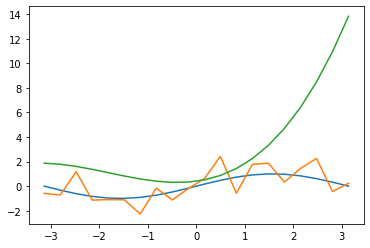

In [ ]:
'''
a1_question_1: 

build a linear regression model 

learning_rate = 1e-6
'''
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
#plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
#plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##print(t, loss)
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()



Result: y = -0.7077293037948372 + 0.24091841560236385 x + -0.12632388891693774 x^2 + -0.06985040513536822 x^3


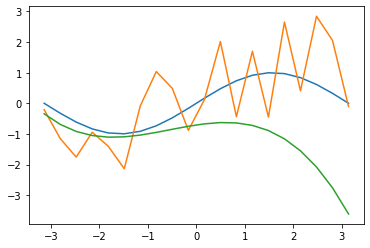

In [ ]:
'''
a1_question_1

learning_rate = 1e-5
'''
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

plt.plot(x,y)
#plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
#plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-5
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

plt.plot(x, y_pred)
plt.show()



Result: y = 0.18335782041256446 + -0.23496823561588673 x + 0.15972720499890947 x^2 + 0.061342960065336204 x^3


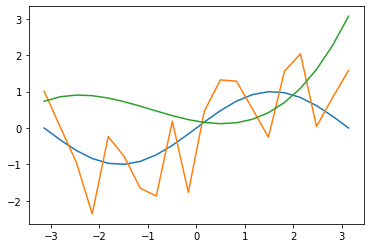

In [ ]:
'''
a1_question_1

learning_rate = 1e-4
'''
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
#plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
#plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-4
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##print(t, loss)
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()



Result: y = -0.04395033568916319 + 1.230393897013786 x + -1.6364153474596363 x^2


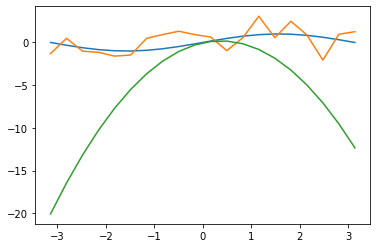

In [ ]:
'''
a1_question_1:  build a linear regression model 

degree = 2
learning_rate = 1e-6

'''


import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
#plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
#plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()

learning_rate = 1e-6
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    #grad_d = (grad_y_pred * x ** 3).sum()
    #grad_e = (grad_y_pred * x ** 4).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    #d -= learning_rate * grad_d
    #e -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2')
#print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
#print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()


Result: y = 0.44810058248124723 + 0.23990676023158666 x + -0.022208983302495225 x^2 + -0.003707407140657228 x^3


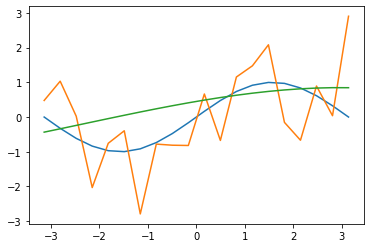

In [ ]:
'''
a1_question_1:  build a linear regression model 

degree = 3
learning_rate = 1e-4

'''
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
#plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
#plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-4

for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##print(t, loss)
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()



Result: y = 0.8343390893043011 + 0.13533997885929364 x + -0.542992298141339 x^2 + -0.37651496510105165 x^3 + 0.2799500600712782 x^4


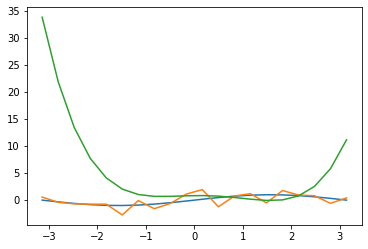

In [ ]:
'''
a1_question_1:  build a linear regression model 

degree = 4
learning_rate = 1e-6

'''

import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
#plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
#plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()

learning_rate = 1e-6
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    grad_e = (grad_y_pred * x ** 4).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    e -= learning_rate * grad_d

#print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x,y_pred)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


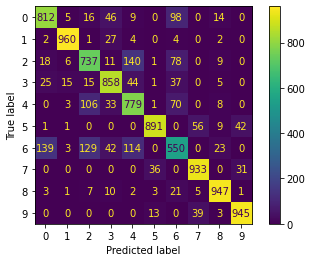

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [6]:
'''
a1_question_4:  perform a recognition task using logistic regression 

'''

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)


##X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

logi_regr = LogisticRegression(random_state=None)
##logi_regr.fit(X_train_scaled, y_train)
logi_regr.fit(X_train, y_train)

y_pred = logi_regr.predict(X_test)

 
# compute accuracy of the model
logi_regr.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
#cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

##cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()


# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





<class 'numpy.ndarray'>
(60000, 784)
(10000, 784)
(60000,)
(10000,)


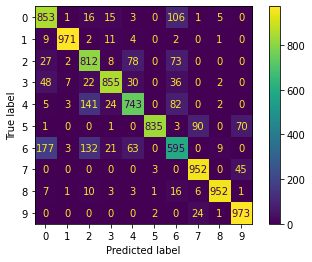

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.98      0.97      0.98      1000
           2       0.72      0.81      0.76      1000
           3       0.91      0.85      0.88      1000
           4       0.80      0.74      0.77      1000
           5       0.99      0.83      0.91      1000
           6       0.65      0.59      0.62      1000
           7       0.89      0.95      0.92      1000
           8       0.98      0.95      0.97      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [3]:

'''
a1_question_5:  use k-NN classifier to perform recognition 

k = 3

'''

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

##X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel


print(type(testLabel))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
##cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





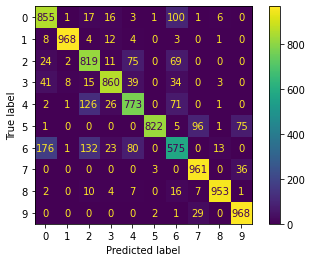

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [4]:

'''
a1_question_5:  use k-NN classifier to perform recognition 

k = 5

'''

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
##X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)


# train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
##cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

##cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()


# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





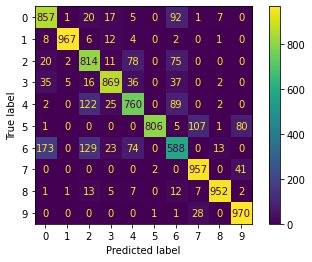

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.76      0.77      1000
           5       1.00      0.81      0.89      1000
           6       0.65      0.59      0.62      1000
           7       0.87      0.96      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [5]:

'''
a1_question_5:  use k-NN classifier to perform recognition 

k = 7

'''


import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
##X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)

# train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
##cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

##cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
 

# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))



